In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('ab_data_cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.shape

(290584, 6)

In [6]:
p_old = (df['landing_page'] == 'old_page').mean()
p_old

0.4999380557773312

In [7]:
p_new = (df['landing_page'] == 'new_page').mean()
p_new

0.5000619442226688

<h3>A/B Testing</h3>
<b>Hypotheses</b>

<b>Null Hypothesis: </b> p_new is less than or equal to p_old

<b>Alternate Hypothesis:</b> p_new is greater than p_old

In [8]:
convert_mean = df['converted'].mean()
convert_mean

0.11959708724499628

In [9]:
control_convert = df[df['group'] == 'control']['converted'].mean()
control_convert

0.1203863045004612

In [10]:
treatment_convert = df[df['group'] == 'treatment']['converted'].mean()
treatment_convert

0.11880806551510564

In [11]:
n_old = df[df['landing_page'] == 'old_page'].shape[0]
n_old

145274

In [12]:
n_new = df[df['landing_page'] == 'new_page'].shape[0]
n_new

145310

In [39]:
sample_df = df.sample(30000)
p_diffs = []

In [36]:
random.seed(42)

In [37]:
#Bootstrapping I

In [40]:
for _ in range(10000):
    mean_new = np.random.choice([1, 0], p=[p_new, 1 - p_new], size = n_new).mean()
    mean_old = np.random.choice([1, 0], p=[p_old, 1 - p_old], size = n_old).mean()
    p_diffs.append(mean_new.mean() - mean_old.mean())

In [41]:
import seaborn as sns
sns.set()

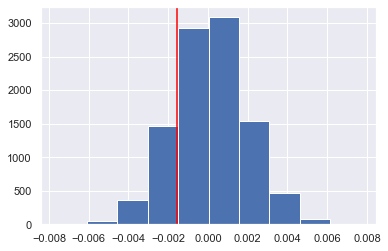

In [46]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color = 'red')

In [56]:
obs_diff = treatment_convert - control_convert
p_diffs = np.asarray(p_diffs)
(p_diffs > obs_diff).mean()

0.8243

In [47]:
#Bootstrapping II

In [48]:
control_means = []
treat_means = []

In [49]:
for _ in range(10000):
    old = np.random.choice(sample_df[sample_df['group'] == 'control']['converted'], size = 30000)
    control_means.append(old.mean())

In [50]:
for _ in range(10000):
    new = np.random.choice(sample_df[sample_df['group'] == 'treatment']['converted'], size = 30000)
    treat_means.append(new.mean())

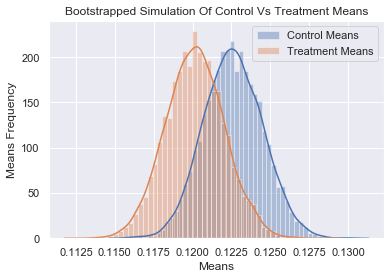

In [51]:
sns.distplot(control_means, label = 'Control Means')
sns.distplot(treat_means, label = 'Treatment Means')
plt.title('Bootstrapped Simulation Of Control Vs Treatment Means')
plt.xlabel('Means')
plt.ylabel('Means Frequency')
plt.legend()
plt.show()

In [25]:
#One tailed test

In [26]:
control_upper = np.percentile(control_means, 95)
control_upper

0.11886666666666666

In [28]:
treat_lower = np.percentile(treat_means, 5)
treat_lower

0.11696666666666666

In [29]:
treat_lower - control_upper

-0.001899999999999999

In [30]:
#Z-Test

In [54]:
import statsmodels.api as sm                 

In [52]:
df_control = df[df['group'] == 'control']
df_treat = df[df['group'] == 'treatment']

convert_old = df_control[df_control['converted'] == 1]['converted'].count()
convert_new = df_treat[df_treat['converted'] == 1]['converted'].count()

In [55]:
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.9050583127590245)